# Project 3: TSP Using Ant Colony Optimization
## CAP4630
Team Members: Hunter Bresler  
Date: 7/9/2023


##Intro  
This project was... less interesting than the genetic algorithm. The algorithm simply seems to be far better, or at least more optimized to solve this type of problem at this scale, so I didn't explore its intricacies as much. However, its success is interesting in its own right and I will explore it more later in this report. I had no inspiration for my ACO algorithm's code outside of the book showing me what ACO was. I'm assuming that doesn't actually count as a reference though, so I didn't include it in the references section.
##My Code  
My code is structured very similarly to the genetic algorithm. A class for representing the cities, the grid the cities are on, and for the ACO algorithm itself. The only real difference in structure is that instead of calculating the city-to-city distances on the fly, I calculated all of them in advance and put them (as well as the pheromone tracking) in a distance matrix.

###Questions
  
- How were the cities and distances represented (as a data structure):  
Cities are class objects with x and y coordinates as variables. They are in a list for the algorithm to take from. All of the distances are kept in a matrix; the pheremones are tracked in the same matrix.  

- How did you encode the solution space:  
The solution space was a 200x200-unit grid which has cities randomly placed on it. For representing the route each ant takes there is an ordered list of ints with each int being an index in the cityList mentioned above.

- How did you handle the creation of the initial ant population:  
The same as every population. No errors occur since the phermones between cities are all set to 1 by default.  

- How did you handle the updating of the pheromone trails:  
I added an extra variable to the distance matrix to track the pheromone trails, and update the trails after each population is created. I opted not to imitate evaporation of the pheromone trails because it seemed unneccessary.

- Which strategy(ies) did you use to compute the best solution:  
I don't understand the question, I didn't change the algorithm at all and still got the same, best result that the genetic algorithm got. So... I guess none? I never needed to change the heuristic equation from the book's example either.

- Which stopping condition did you use? Why:  
A set generation count. Simplest to implement and easiest to test with.

- What other parameters, design choices, initialization and configuration steps are relevant to your design and implementation:  
I don't think there are any, however, (feel free to skip this part) I'll use this time to bring up some interesting changes I've thought to make to the algorithm that are outside of this project. Mainly, I'm interested in only updating the pheromone trails of the shorter paths of each generation. I think this would be very interesting but, it might limit the exploration capabilities of the algorithm. Though I think pheromone evaporation might offset it enough for it to work out.

- Which (simple) experiments have you run to observe the impact of different design decisions and parameter values:  
Just different generation counts and population sizes. But, the algorithm is so much better than the genetic algorithm that I didn't feel the need to test it. If the scope of this project was larger, I may have tried to optimize the algorithm further, but it felt unnecessary.


##This is the plotting code, taken from payoung on github at https://gist.github.com/payoung/6087046.  
It has been modified to work with my project's data structures.



In [4]:
# NOT MY CODE
import matplotlib.pyplot as plt

def plotTSP(path, points):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes

    """

    # Unpack the primary TSP path and transform it into a list of ordered
    # coordinates

    x = []; y = []
    for i in path:
        x.append(points[i].X)
        y.append(points[i].Y)

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(0, max(x)*1.1)
    plt.ylim(0, max(y)*1.1)
    plt.show()

##My Literal Code

In [32]:
# Project 3: ACO
# Author: Hunter Bresler
# Date: 7/9/2023

import math
import random

# Represents a city on a TSP_Grid
class City:
    def __init__(self, x, y):
        self.X = x
        self.Y = y

    # Calculates the distance between 2 cities
    def city_distance(self, otherCity):
        xDistance = abs(self.X - otherCity.X)
        yDistance = abs(self.Y - otherCity.Y)
        totalDistance = math.sqrt((xDistance ** 2) + (yDistance ** 2))
        return totalDistance

# Creates a TSP problem by building a grid with cities in it
class TSP_Grid:
    def __init__(self, cityCount):
        self.xAxis = 200
        self.yAxis = 200
        self.cityCount = cityCount
        self.cityList = self.generate_cities()

    # Randomly generates the locations of cities on the TSP_Grid
    # Allows for cities with the same location (although very unlikely)
    def generate_cities(self):
        cityList = []
        for i in range(0, self.cityCount):
            cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
        return cityList

# Controls all aspects of the ACO
class TSP_ACO:
    def __init__(self, cityCount, populationSize):
        self.gridTSP = TSP_Grid(cityCount)
        self.cityCount = self.gridTSP.cityCount
        self.cityList = self.gridTSP.cityList
        self.cityMatrix = self.create_city_matrix()
        self.pheromoneIndex = 1
        self.populationSize = populationSize
        #random.seed() # Switching to a random seed after the TSP_Grid is built
        self.population = self.create_population()
        self.bestRoute = self.population[self.populationSize-1]

    # driver function of the GA
    def run_ACO(self, generations):
        generationCount = 1
        #print(f"The Best Route found by generation {generationCount} is: {self.bestRoute.routeLength}\n")

        # Run a new generation of the GA generations times
        for i in range(generations-1):
            generationCount = generationCount + 1
            #Generate population, then add pheromones, then get the best route
            self.population = self.create_population()
            self.add_pheromones()
            if (self.population[self.populationSize-1].routeLength < self.bestRoute.routeLength):
                self.bestRoute = self.population[self.populationSize-1]
            # Print the best and worst of each generation
            #if generationCount%(generations/10) == 0 or generationCount == 1:
                #print(f"The Best Route found by generation {generationCount} is: {self.bestRoute.routeLength}\n")

        print(f"The Best Route found by {generationCount} generations was: {self.bestRoute.route}, {self.bestRoute.routeLength}\n")


    # Creates a matrix of each city's distance to other cities
    # As well as the # of pheremones on that path
    def create_city_matrix(self):
        matrix = {}
        # This is python chaos that I barely understand because python
        for city1 in self.cityList:
            matrix[city1] = {}
            for city2 in self.cityList:
                matrix[city1][city2] = [0, 1]
                matrix[city1][city2][0] = city1.city_distance(city2)
        return matrix

    # Creates the initial population for the GA
    def create_population(self):
        population = []
        # Create population size Ants
        for i in range(0, self.populationSize):
            ant = Ant(self.cityList, self.cityMatrix)
            ant.ant_travel()
            population.append(ant)
        population.sort(key=lambda x: x.routeLength, reverse=True) # sort the population by fitness
        return population

    # Adds the pheromones to the city matrix
    def add_pheromones(self):
        for ant in self.population:
            for i in range(len(ant.route)):
                try: #try statement for connecting the last and first cities
                    self.cityMatrix[self.cityList[ant.route[i]]][self.cityList[ant.route[i+1]]][self.pheromoneIndex] += 1
                except:
                    self.cityMatrix[self.cityList[ant.route[i]]][self.cityList[ant.route[0]]][self.pheromoneIndex] += 1

# Represents a member of the colony's population
class Ant:
    def __init__(self, cityList, cityMatrix):
        self.cityList = cityList
        self.cityCount = len(cityList)
        self.cityMatrix = cityMatrix
        self.route = []
        self.routeLength = 0.0

    # Simulate an ant traveling to every city
    def ant_travel(self):
        for i in range(self.cityCount):
            self.travel_to_a_city()
        self.calculate_route_length()

    # Simulate traveling to a city
    def travel_to_a_city(self):
        city = self.choose_a_city()
        self.route.append(city)

    # Chooses a city to travel to
    def choose_a_city(self):
        availableCities = self.get_available_cities()
        paths = []
        odds = list(range(len(availableCities)))
        a = 1
        b = 2
        sum = 0

        # Choose a random city 10% of the time
        # Also choose a random city when route is empty
        if (random.random() <= .1) or (self.route == []):
            return self.cityList.index(availableCities[int(random.random()*len(availableCities))])

        # Get a list of each paths' distance and pheremone count
        for i in range(len(availableCities)):
            paths.append(self.cityMatrix[self.cityList[self.route[-1]]][availableCities[i]])
        # get the heuristic values for each path
        for i in odds:
            #try:
            odds[i] = (paths[i][1]**a)*((1/paths[i][0])**b)
            sum += odds[i]
            #except:
                #print(self.cityList[self.route[-1]])
                #print(availableCities[i])
                #print(paths[i])

        # spin the wheel
        rand = random.random()*sum
        for index,i in enumerate(odds):
            rand += i
            if rand > sum:
                return self.cityList.index(availableCities[index])

    # Returns a list of untraveled to cities
    def get_available_cities(self):
        availableCities = list(self.cityList)
        for i in self.route:
            availableCities.remove(self.cityList[i])
        return availableCities

    # Calculate the length of a route
    def calculate_route_length(self):
        for i in range(len(self.route)):
            try:
                #self.routeLength += self.city_distance(self.cityList[self.route[i]], self.cityList[self.route[i+1]])
                self.routeLength += self.cityMatrix[self.cityList[self.route[i]]][self.cityList[self.route[i+1]]][0]
            except:
                #self.routeLength += self.city_distance(self.cityList[self.route[i]], self.cityList[self.route[0]])
                self.routeLength += self.cityMatrix[self.cityList[self.route[i]]][self.cityList[self.route[0]]][0]

def run_ACO(NUMBER_OF_CITIES, POPULATION_SIZE, NUMBER_OF_GENERATIONS):
    # Set the initial seed to be 256 for TSP_Grid generation
    random.seed(256)
    salesmanProblem = TSP_ACO(NUMBER_OF_CITIES, POPULATION_SIZE)
    salesmanProblem.run_ACO(NUMBER_OF_GENERATIONS)
    # Using the plotting code above
    plotTSP(salesmanProblem.bestRoute.route, salesmanProblem.gridTSP.cityList)


##Test runs
For reference, the first number is the number of cities, the second is the population size, and the third is the number of generations to run.
###Run 1
There's nothing special here yet, but there is a clear difference between the ACO and GA algorithms; the ACO is far better (per generation/population size, may not be the case in terms of time complexity/time till reaching an acceptable solution). My GA running with (25, 50, 100) had a route length of 1278. Also, just visually, this is similar the best distance I've gotten, which is interesting.

The Best Route found by 10 generations was: [0, 6, 18, 9, 2, 19, 7, 4, 13, 12, 11, 23, 24, 15, 22, 14, 8, 16, 10, 20, 5, 1, 21, 17, 3], 1136.755134387337



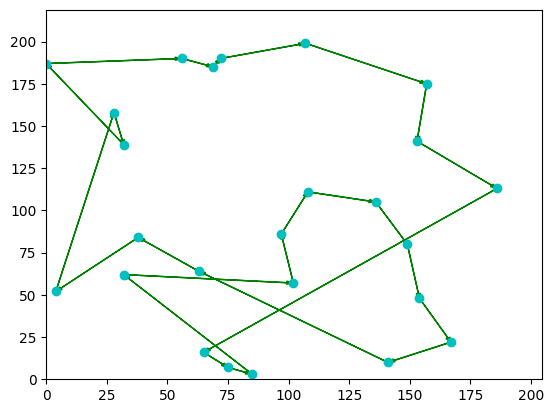

In [16]:
run_ACO(25, 10, 10)

###Run 2
Nothing too special here. There is a modest improvement, however, it's only interesting after comparing it to the next run.

The Best Route found by 10 generations was: [13, 17, 12, 23, 11, 24, 15, 22, 14, 8, 16, 20, 2, 19, 7, 21, 1, 5, 4, 3, 9, 18, 10, 6, 0], 998.7704556097514



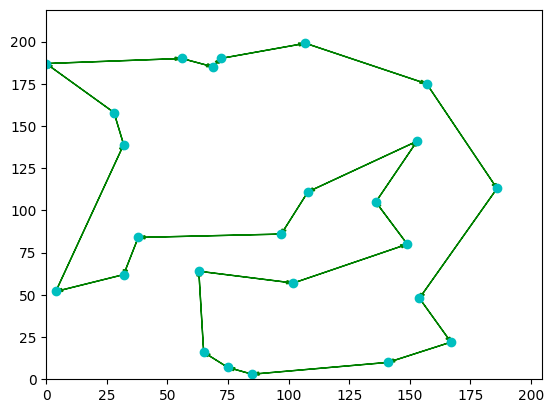

In [35]:
run_ACO(25, 50, 10)

###Run 3
Here we can see a slight improvement, possibly showing that generations are (possibly) more valuable than population size. This is likely true because my algorithm only updates pheromone trails after each generation is generated. Likely, there isn't any difference if you were to update the trails on the fly. Also, it's notable that the generation vs. population size differences are far more influencial to the GA's performance.

The Best Route found by 50 generations was: [2, 9, 3, 0, 6, 18, 20, 10, 16, 8, 22, 14, 15, 11, 23, 24, 12, 17, 13, 4, 5, 1, 21, 7, 19], 941.6712042052595



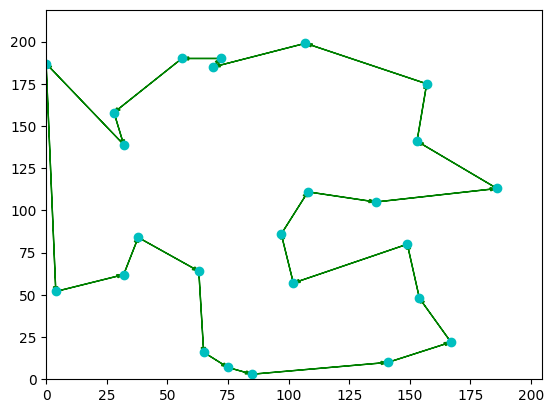

In [36]:
run_ACO(25, 10, 50)

###Run 4
This is just about fully optimized, and is another nice improvement. It also looks fairly similar to the run above it.

The Best Route found by 100 generations was: [18, 6, 0, 3, 9, 2, 19, 7, 21, 1, 5, 4, 17, 12, 13, 23, 11, 24, 15, 22, 14, 8, 16, 10, 20], 874.6263337536261



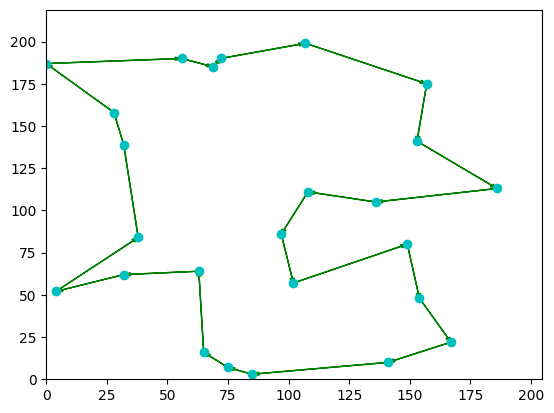

In [46]:
run_ACO(25, 100, 100)

###Run 5
This is the pinnacle of the (256) seed I use to generate the TSP grid of cities, at least the pinnacle my algorithms have reached. It makes a slight routing improvement compared to the previous run. It also reaches this route with the parameters (25, 500, 100), but I like this more because the route ends up being EXACTLY the same as the best route my GA found, order and everything. I also think it looks like a sports logo which is neat.

The Best Route found by 100 generations was: [15, 22, 14, 8, 16, 10, 20, 9, 18, 6, 0, 3, 2, 19, 7, 21, 1, 5, 4, 17, 12, 13, 23, 11, 24], 869.8055326997376



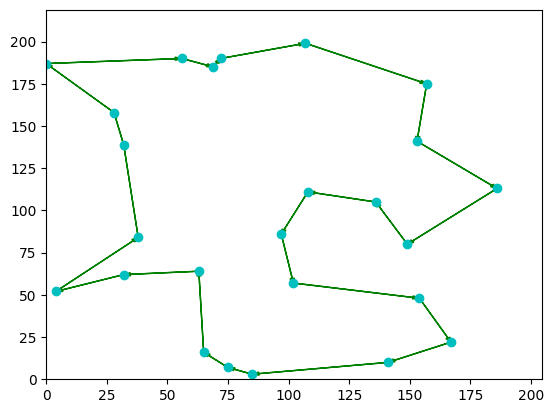

In [48]:
run_ACO(25, 1000, 100)

###Run 6
This was me testing if the algorithm could find a better route, and it didn't. I also tried updating the seed after the cities were generated, but this route was the best I ever found. I'd be very curious if there was a better route than this, but I'd assume it'd have to be drastically different if it exists.

Also, if the graph isn't visible DON'T run this. You can cancel it if you do, but it will take 20ish minutes to run.

The Best Route found by 2000 generations was: [8, 16, 10, 20, 9, 18, 6, 0, 3, 2, 19, 7, 21, 1, 5, 4, 17, 12, 13, 23, 11, 24, 15, 22, 14], 869.8055326997375



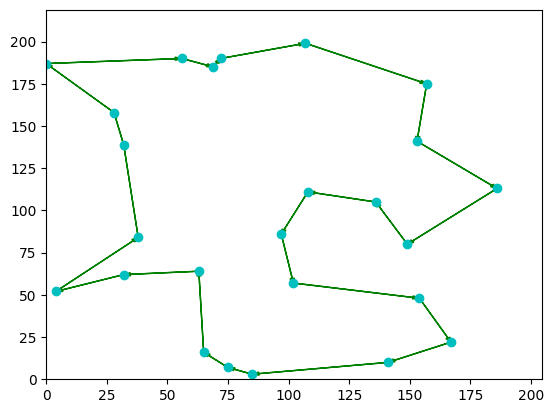

In [34]:
run_ACO(25, 2000, 2000)

##Conclusion
This algorithm was pretty interesting and quite simple, far simpler than the GA at least. Also being able to visualize the routes is very cool, I really hope that it's okay that I used someone else's code to make the graphs. The only real difficulties I had was using the distance matrix since it felt pretty clunky, but it really only needed some debugging since I was unfamiliar with the way it's coded. I really wish I had more to talk about, but the algorithm already worked without any tweaking. I never ran into issues or local minimums aside from when I forgot to add an addPheromones() function call in my first test runs.  

One last thing, the guidelines mentioned having figures, but didn't specify what that meant or a required amount, so I just went without them. I'm not sure what would need a figure or graph outside of the TSP Grid seen in the above test runs, so I hope I don't get points off for it.

##References
The plotting code was taken from payoung on github at https://gist.github.com/payoung/6087046. It was been modified to work with my project's data structures.